In [101]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


In [52]:
# read the data
df = pd.read_csv("D:\\Desktop\\Work\\archive1\\iplauction2023.csv")
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


Basic Data set Information

In [53]:
# shape of the data
df.shape

(309, 7)

In [54]:
# columns of the data
df.columns

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

In [55]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


We can see that there are 309 rows but some columns contians null values.
So we first find the null values in each column.

In [56]:
# null values in each column
null_count = df.isnull().sum()
null_count

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

Null values in percentage

In [57]:
null_percentage = (null_count / len(df)) * 100
print(f"{null_percentage}%")

name                      0.000000
player style              0.000000
nationality               0.000000
base price (in lacs)     51.132686
final price (in lacs)    22.977346
franchise                22.977346
status                    0.000000
dtype: float64%


We see that base price has 51.13% null values.
So we fill the null values with the 20.0 as (in IPL every player has base price 20 Lacs)

Before that, we can see the top 10 columns with null values using chart.

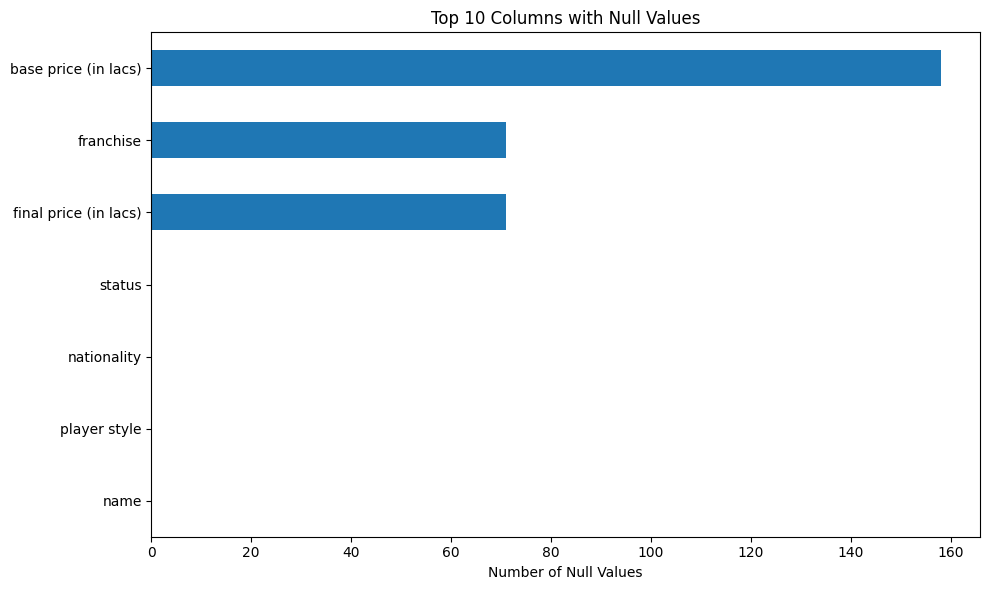

In [58]:
# Plot top 10 columns with null values
plt.figure(figsize=(10, 6))
null_count.sort_values(ascending=True).tail(10).plot(kind='barh')
plt.title('Top 10 Columns with Null Values')
plt.xlabel('Number of Null Values')
plt.tight_layout()
plt.show()

In [59]:
# fill the null values with 20 lacs as base price
df['base price (in lacs)'].fillna('20.0',inplace=True)


Above we use fillna() fn. to fill the null values with 20.0
After that we can see the null values in each column.


In [60]:
df.isnull().sum()

name                      0
player style              0
nationality               0
base price (in lacs)      0
final price (in lacs)    71
franchise                71
status                    0
dtype: int64

As per above we can see that final price and franchise have same null values. 
So we first find that each have same row null values or different.


In [63]:
# Check if NaN values in 'final price' and 'franchise' are at same rows
nan_final_price = df[df['final price (in lacs)'].isna()]
nan_franchise = df[df['franchise'].isna()]

print("Number of NaN values in 'final price':", len(nan_final_price))
print("Number of NaN values in 'franchise':", len(nan_franchise))

# Check if they are the same rows
same_rows = df[df['final price (in lacs)'].isna() & df['franchise'].isna()]
print("\nNumber of rows where both columns have NaN:", len(same_rows))

if len(nan_final_price) == len(nan_franchise) == len(same_rows):
    print("\nAll NaN values occur in the same rows for both columns")
else:
    print("\nNaN values occur in different rows for these columns")


Number of NaN values in 'final price': 71
Number of NaN values in 'franchise': 71

Number of rows where both columns have NaN: 71

All NaN values occur in the same rows for both columns


As per above we can see that final price and franchise have same null values means same rows. So we take decision like they all are UNSOLD during the auctiong.


In [64]:
# Count number of UNSOLD players
unsold_count = len(df[df['status'] == 'UNSOLD'])
print("Number of UNSOLD players:", unsold_count)


Number of UNSOLD players: 71


In [65]:
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,20.0,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [66]:
# Get descriptive statistics
df.describe()

,final price (in lacs)
count,238.000000
mean,368.067227
std,449.070117
min,20.000000
25%,21.250000
50%,150.000000
75%,625.000000
max,1850.000000


Using this descriptive statistics, we can see the range of the data.
Here we can see that the range of the data is from 20 to 1000 lacs. but we can see that there are some outliers in the data.

Which means some players are sold for more than 1000 lacs.


Using the outliers of the data we can see the players that are sold for more than 99% of the players ( or players who are sold for more than 1530 lacs)

In [69]:
q1= df.quantile(0.25)
q3= df.quantile(0.75)
iqr= q3-q1
iqr

final price (in lacs)    603.75
dtype: float64

In [70]:
min_val= q1-1.5*iqr
max_val= q3+1.5*iqr
(min_val,max_val)


(final price (in lacs)   -884.375
 dtype: float64,
 final price (in lacs)    1530.625
 dtype: float64)

In [72]:
# Count outliers
outliers = df[(df['final price (in lacs)'] < min_val['final price (in lacs)']) | 
              (df['final price (in lacs)'] > max_val['final price (in lacs)'])]

print("Number of outliers:", len(outliers))
print("\nOutliers:")
outliers


Number of outliers: 8

Outliers:


,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
136,Nicholas Pooran,WK-Batter,West Indies,200.0,1600.0,LSG,SOLD
147,Ben Stokes,Allrounder,England,200.0,1625.0,CSK,SOLD
148,Cameron Green,Allrounder,Australia,200.0,1750.0,MI,SOLD
150,Sam Curran,Allrounder,England,200.0,1850.0,PBKS,SOLD
290,Rohit Sharma,Batter,India,20.0,1600.0,MI,RETAINED
292,KL Rahul,WK-Batter,India,20.0,1700.0,LSG,RETAINED
296,Ravindra Jadeja,Allrounder,India,20.0,1600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,20.0,1600.0,DC,RETAINED


Using the outlier we can see that there are 4 players who are sold for more than 1530 lacs.


Using this dataset we can see the distribution of the players by player style.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11328\1442716243.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=player_style_counts.index, y=player_style_counts.values,palette='pastel')


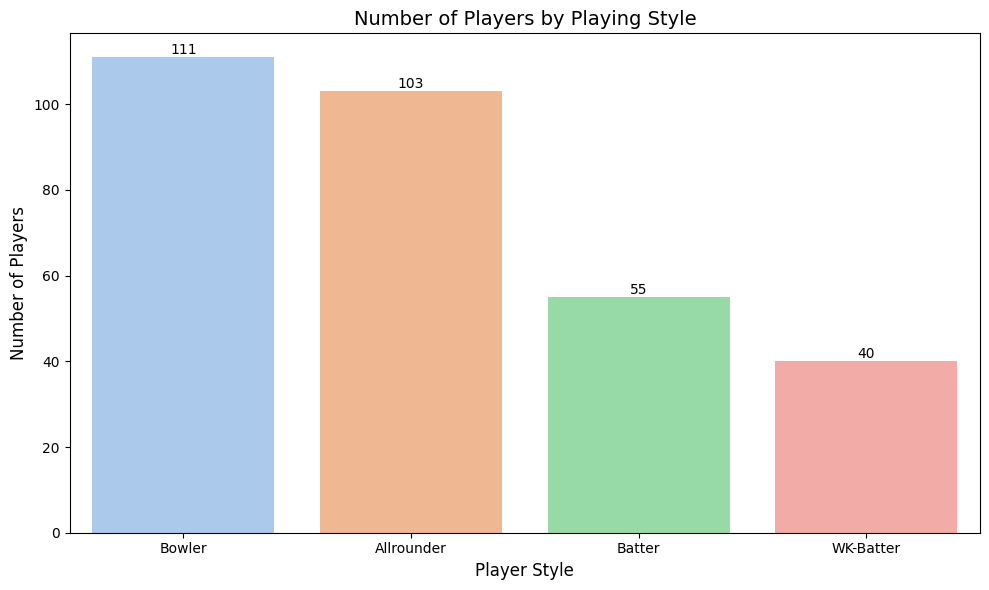

In [86]:
# Count number of players by player style
player_style_counts = df['player style'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=player_style_counts.index, y=player_style_counts.values,palette='pastel')

# Customize the plot
plt.title('Number of Players by Playing Style', fontsize=14)
plt.xlabel('Player Style', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)


# Add value labels on top of bars
for i, v in enumerate(player_style_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Using this bar plot we can see that the most popular player style is Bowler and least popular is WK-Batter. 

Means that there are more bowlers players in the dataset and less wicket keepers batters.


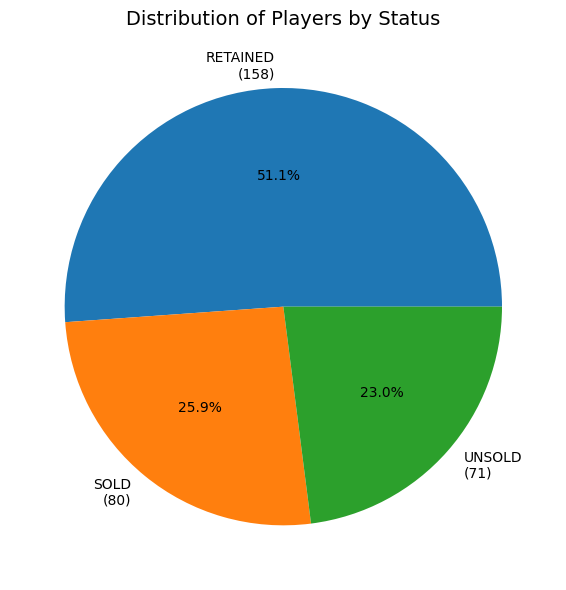

In [80]:
# Count number of players by status
status_counts = df['status'].value_counts()

# Create pie chart
plt.figure(figsize=(10, 6))
plt.pie(status_counts.values, labels=[f'{label}\n({value})' for label, value in zip(status_counts.index, status_counts.values)], 
        autopct='%1.1f%%')

# Customize the plot
plt.title('Distribution of Players by Status', fontsize=14)

plt.tight_layout()
plt.show()


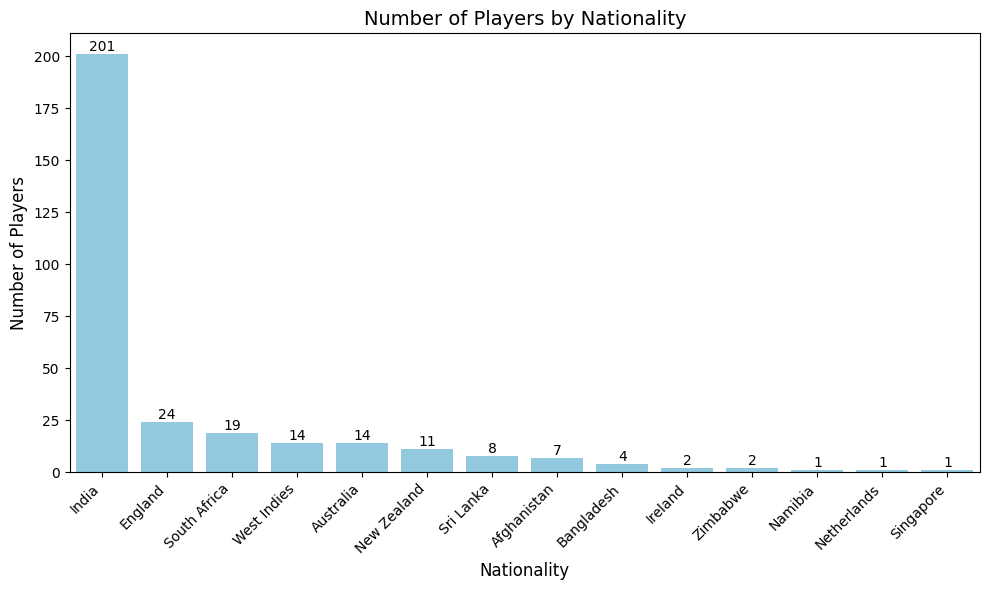

In [88]:
# Count number of players by nationality
nationality_counts = df['nationality'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=nationality_counts.index, y=nationality_counts.values, color='skyblue')

# Customize the plot
plt.title('Number of Players by Nationality', fontsize=14)
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i, v in enumerate(nationality_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Max number of players are from India and followed by England.

Least number of players are from Namibia, Netherlands and Singapore.


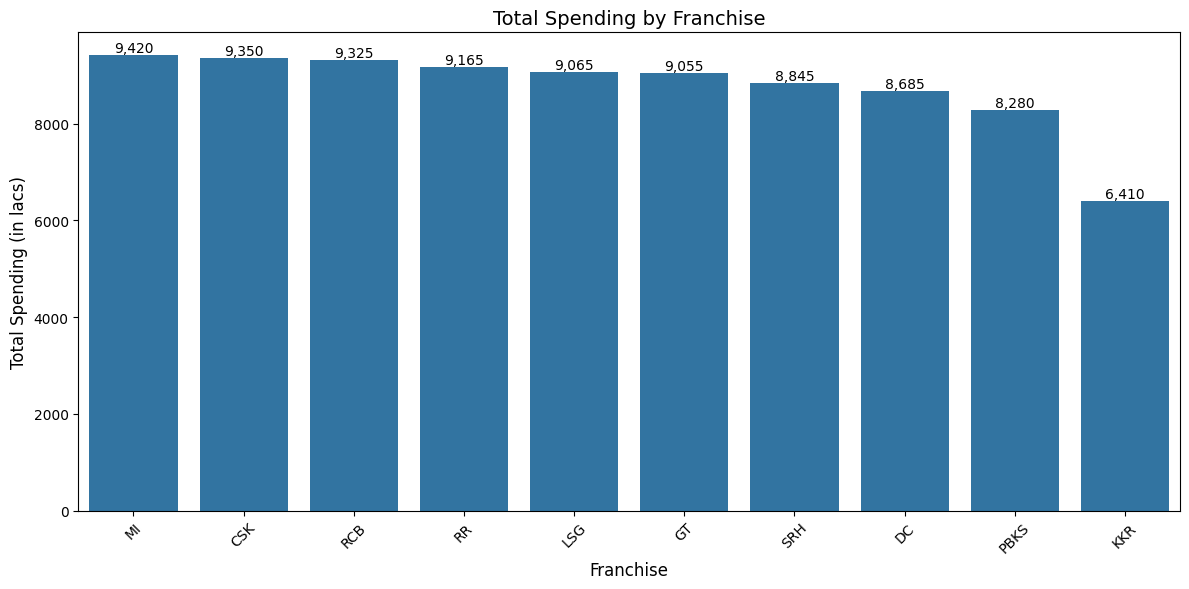

In [45]:
# Group by franchise and calculate total spending
franchise_spending = df.groupby('franchise')['final price (in lacs)'].sum().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=franchise_spending.index, y=franchise_spending.values)

# Customize the plot
plt.title('Total Spending by Franchise', fontsize=14)
plt.xlabel('Franchise', fontsize=12)
plt.ylabel('Total Spending (in lacs)', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on top of bars
for i, v in enumerate(franchise_spending.values):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


This visualization shows that the most spending franchise is MI and least spending is KKR.


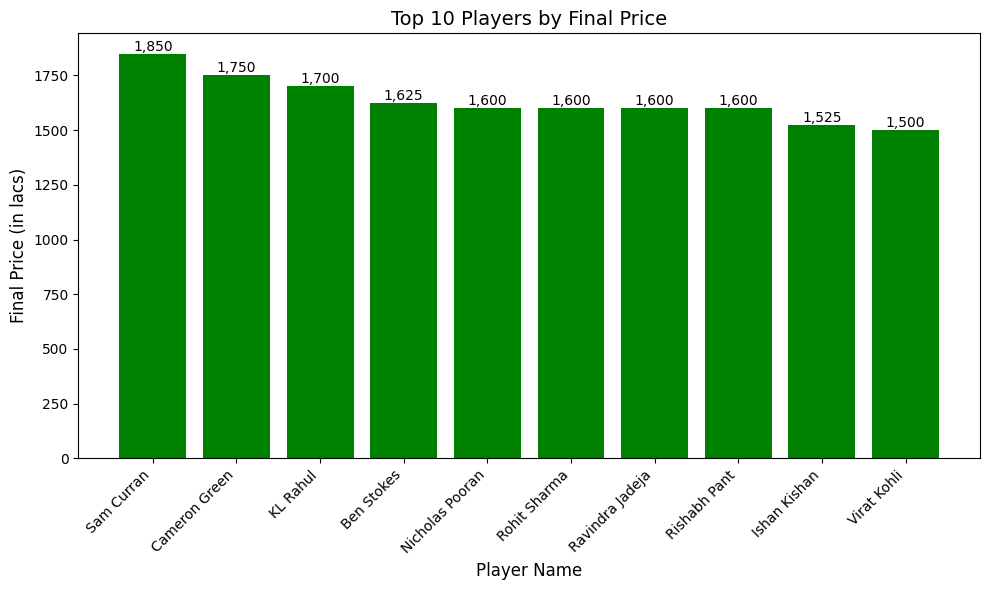

In [95]:
# Get the top 10 players by final price
top_players = df.nlargest(10, 'final price (in lacs)')

plt.figure(figsize=(10, 6))
bars = plt.bar(top_players['name'], top_players['final price (in lacs)'], 
              color='green')

plt.title('Top 10 Players by Final Price', fontsize=14)
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Final Price (in lacs)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.0f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

Sam Curran was the highest-priced player in the IPL 2023 Auction, being sold for 18.50 Crores.



Retained Players List:
Name: Harshit Rana
Player Style: Bowler
Nationality: India
Franchise: KKR
Price: 20 lacs
--------------------------------------------------------------------------------
Name: Rajat Patidar
Player Style: Batter
Nationality: India
Franchise: RCB
Price: 20 lacs
--------------------------------------------------------------------------------
Name: Matheesha Pathirana
Player Style: Bowler
Nationality: Sri Lanka
Franchise: CSK
Price: 20 lacs
--------------------------------------------------------------------------------
Name: Tristan Stubbs
Player Style: WK-Batter
Nationality: South Africa
Franchise: MI
Price: 20 lacs
--------------------------------------------------------------------------------
Name: Ravi Bishnoi
Player Style: Bowler
Nationality: India
Franchise: LSG
Price: 400 lacs
--------------------------------------------------------------------------------
Name: Yash Dhull
Player Style: Batter
Nationality: India
Franchise: DC
Price: 50 lacs
----------------

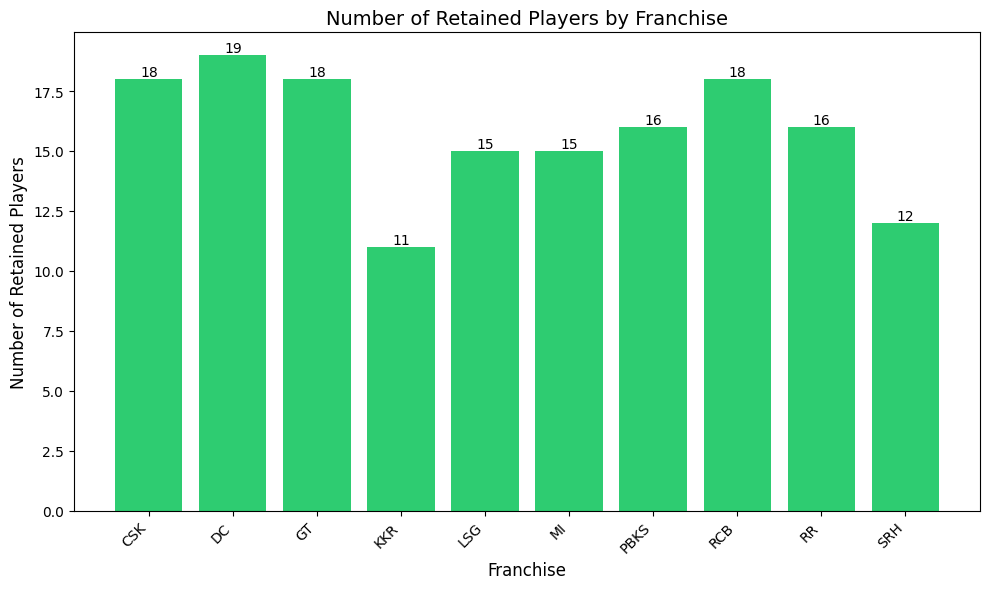

In [50]:
# Get list of retained players
retained_players = df[df['status'] == 'RETAINED']

# Display retained players with key information
print("\nRetained Players List:")
print("=" * 80)
for _, player in retained_players.iterrows():
    print(f"Name: {player['name']}")
    print(f"Player Style: {player['player style']}")
    print(f"Nationality: {player['nationality']}")
    print(f"Franchise: {player['franchise']}")
    print(f"Price: {player['final price (in lacs)']:,.0f} lacs")
    print("-" * 80)

# Create a bar plot of retained players by franchise
plt.figure(figsize=(10, 6))
retained_by_franchise = retained_players.groupby('franchise').size()

plt.bar(retained_by_franchise.index, retained_by_franchise.values,
        color='#2ECC71')

plt.title('Number of Retained Players by Franchise', fontsize=14)
plt.xlabel('Franchise', fontsize=12)
plt.ylabel('Number of Retained Players', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i, v in enumerate(retained_by_franchise.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Above provide proper information about the retained players by franchise as DC retained max number of players while KKR the least.


In [96]:
# highest paid retained player
highest_retained = retained_players.loc[retained_players['final price (in lacs)'].idxmax()]

print("\nHighest Paid Retained Player:")
print("=" * 50)
print(f"Name: {highest_retained['name']}")
print(f"Player Style: {highest_retained['player style']}")
print(f"Nationality: {highest_retained['nationality']}")
print(f"Franchise: {highest_retained['franchise']}")
print(f"Price: {highest_retained['final price (in lacs)']:,.0f} lacs")



Highest Paid Retained Player:
Name: KL Rahul
Player Style: WK-Batter
Nationality: India
Franchise: LSG
Price: 1,700 lacs


C:\Users\DELL\AppData\Local\Temp\ipykernel_11328\1525331593.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='nationality', y='final price (in lacs)', data=df,


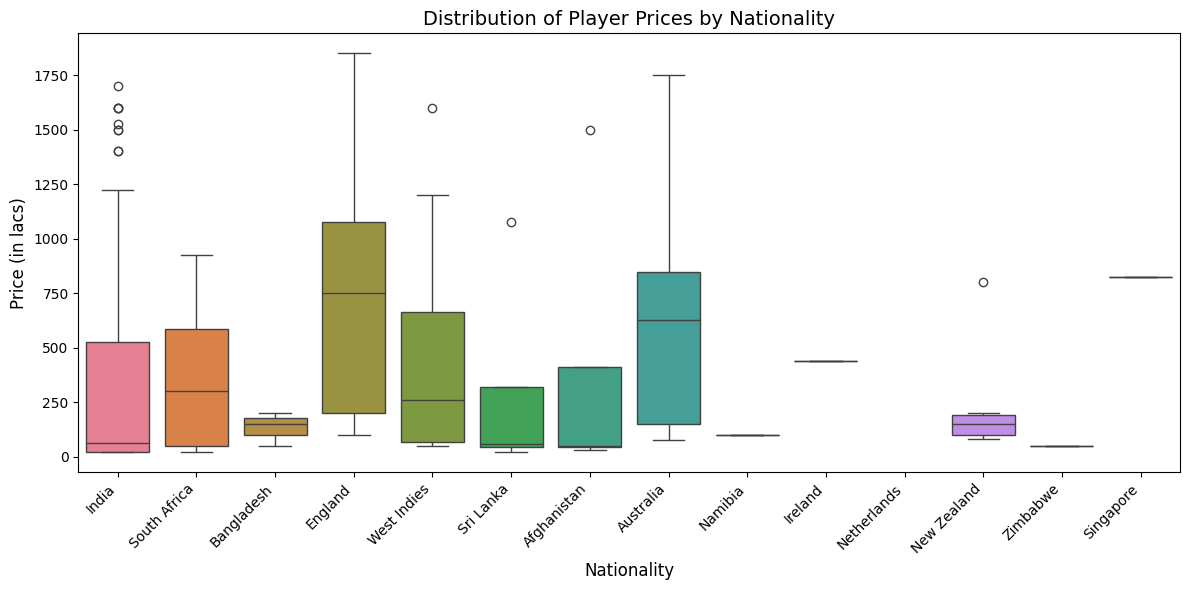

In [97]:
# Create a box plot for final prices by nationality
plt.figure(figsize=(12, 6))

# Create box plot using seaborn
sns.boxplot(x='nationality', y='final price (in lacs)', data=df, 
            palette='husl')

plt.title('Distribution of Player Prices by Nationality', fontsize=14)
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Price (in lacs)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


This box plot visualization shows that the average price of the players with respect to their nationality. 

And shows the outliers also


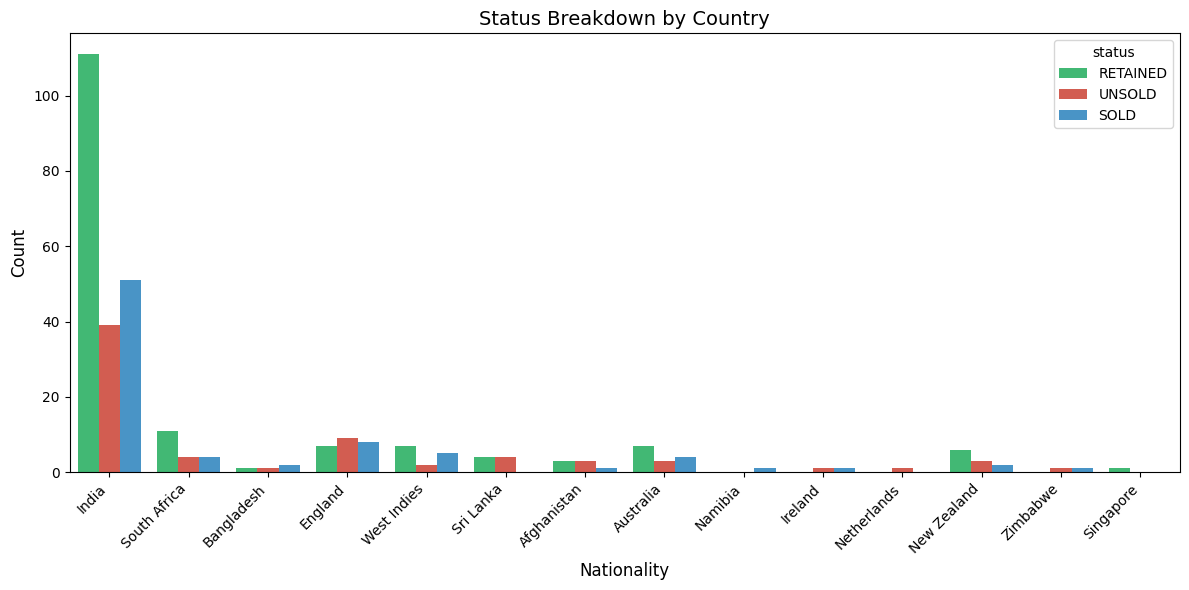

In [98]:
# Create a stacked bar plot showing status breakdown by nationality
plt.figure(figsize=(12, 6))

# Create the stacked bar plot using seaborn
sns.countplot(data=df, x='nationality', hue='status', palette=['#2ecc71', '#e74c3c', '#3498db'])

plt.title('Status Breakdown by Country', fontsize=14)
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()


Using this stacked bar plot we can see that the most number of players are retained by India. 
And also shows the visualization of players who are sold or unsold by their nationality.


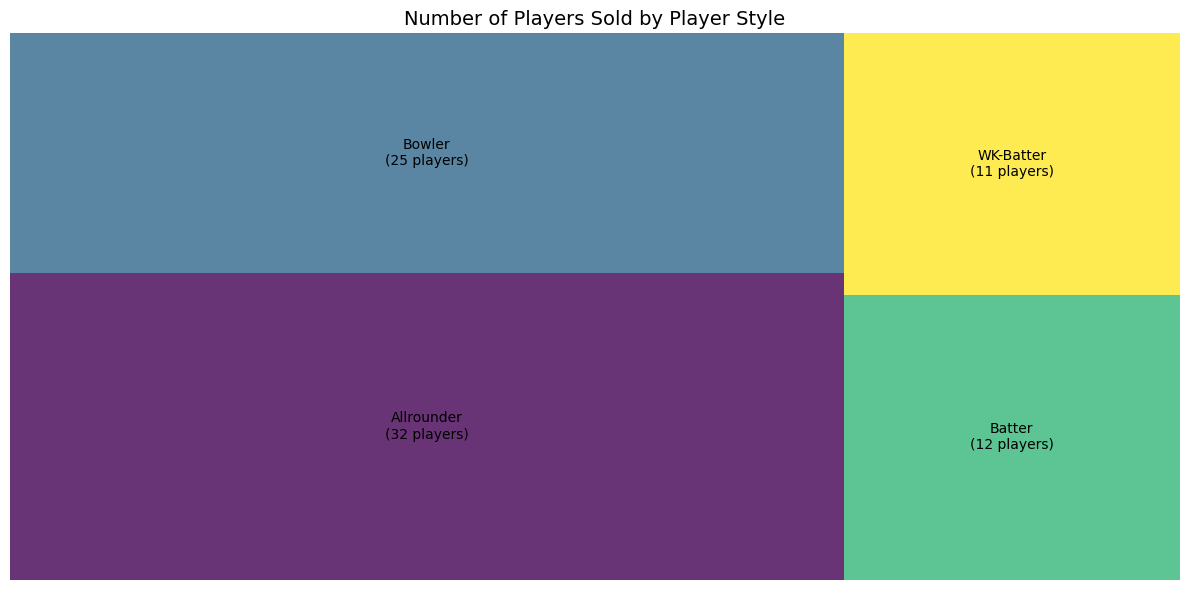


Player style with most sales: Allrounder (32 players)


In [102]:
# Create a DataFrame with only sold players
sold_players = df[df['status'] == 'SOLD']

# Count the number of sold players by style
style_sold_counts = sold_players['player style'].value_counts()

# Create data for treemap
sizes = style_sold_counts.values
labels = [f"{style}\n({count} players)" for style, count in zip(style_sold_counts.index, style_sold_counts.values)]

# Create figure
plt.figure(figsize=(12, 6))

# Create treemap
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=plt.cm.viridis(np.linspace(0, 1, len(sizes))))

plt.title('Number of Players Sold by Player Style', fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the style with most sales
most_sold_style = style_sold_counts.index[0]
print(f"\nPlayer style with most sales: {most_sold_style} ({style_sold_counts[0]} players)")


Using this treemap we can see that the most number of ALL-ROUNDER are sold.
I used Cursor ai for this treemap for better programming.


We also find insights from particular franchise like GT(Gujarat Titans).


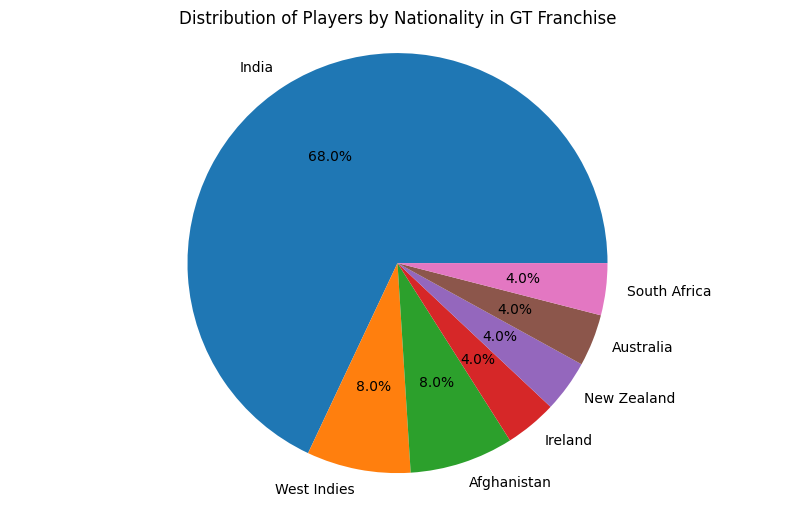


Number of players by nationality in GT:
India: 17 players
West Indies: 2 players
Afghanistan: 2 players
Ireland: 1 players
New Zealand: 1 players
Australia: 1 players
South Africa: 1 players


In [103]:
# Filter data for GT franchise
gt_players = df[df['franchise'] == 'GT']

# Count players by nationality
nationality_counts = gt_players['nationality'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(nationality_counts.values, labels=nationality_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Players by Nationality in GT Franchise')

plt.axis('equal')
plt.show()

# Print the counts
print("\nNumber of players by nationality in GT:")
for nation, count in nationality_counts.items():
    print(f"{nation}: {count} players")


This pie chart shows that the most number of players are from India and followed by West Indies and Afghanistan.


In [111]:
gt_players.sort_values(by='final price (in lacs)', ascending=False)

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
301,Hardik Pandya,Allrounder,India,20.0,1500.0,GT,RETAINED
300,Rashid Khan,Bowler,Afghanistan,20.0,1500.0,GT,RETAINED
181,Rahul Tewatia,Allrounder,India,20.0,900.0,GT,RETAINED
299,Shubman Gill,Batter,India,20.0,800.0,GT,RETAINED
270,Mohammed Shami,Bowler,India,20.0,625.0,GT,RETAINED
104,Shivam Mavi,Bowler,India,40.0,600.0,GT,SOLD
57,Joshua Little,Bowler,Ireland,50.0,440.0,GT,SOLD
219,Yash Dayal,Bowler,India,20.0,320.0,GT,RETAINED
195,Ravisrinivasan Sai Kishore,Bowler,India,20.0,300.0,GT,RETAINED
267,David Miller,Batter,South Africa,20.0,300.0,GT,RETAINED


In [107]:
# Count players by player style
gt_player_style = gt_players['player style'].value_counts()
gt_player_style

Bowler        11
Allrounder     5
Batter         5
WK-Batter      4
Name: player style, dtype: int64

## Based on the comprehensive IPL 2023 auction analysis:

 1. Player Style Distribution:
    - Bowlers form the largest category across teams
    - All-rounders are highly valued, showing teams' preference for versatile players
    - Pure batters are relatively fewer compared to bowling options
    
 2. Nationality Distribution:
    - Indian players form the majority due to IPL regulations
    - England and Australia contribute significant overseas talent
    - Some teams show preference for specific nationalities (e.g., GT with Afghan players)

 3. Financial Analysis:
    - Average player price is around 368 lacs
    - Most expensive players crossed 1600 lacs (Sam Curran, Ben Stokes, Cameron Green)
    - Retained players often command higher prices than auction purchases

 4. Team-wise Strategies:
    - GT focuses on bowling strength with Indian core
    - Most teams maintain balance between domestic and overseas players
    - High investment in all-rounders across franchises

 5. Price Distribution:
    - Median price of 150 lacs indicates moderate base valuations
    - 75% of players are valued under 625 lacs
    - Premium prices for multi-skilled players and proven performers
    - Notable difference between base and final prices for star players
